# Modelo de regresión lineal 2

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from regressors import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Estilos
sns.set(style='whitegrid')

## Preprocesamiento y entrenamiento

In [22]:
# Carga de datos
df = pd.read_csv('../data/processed/top_12_carros_vendidos.csv')

In [23]:
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist() # Tomamos las variables categóricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Tomamos las variables numéricas

In [24]:
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
columnas_bool = df.select_dtypes(include=['bool']).columns.tolist()
df[columnas_bool] = df[columnas_bool].astype(int)

In [25]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ Astra,model_ C Class,model_ Corsa,...,model_ Kuga,model_ Mokka X,model_ Polo,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,16500,16570,125,58.9,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2017,14250,55594,135,148.7,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,16000,45456,30,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,12600,78957,30,62.8,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,15100,29213,30,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Se separan las columnas
X_cols = list(set(df.columns) - set(['price']))
Y_cols = ['price']

X = df[X_cols].values
Y = df[Y_cols]

# Se divide el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Estandarización o normalización
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

# Crear el modelo
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

## Métricas

In [27]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(Y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(Y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df.price.mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, Y_test), 3)

In [28]:
model.intercept_ = model.intercept_[0] # Limpian los datos
model.coef_ = model.coef_.reshape(-1) # Limpian los datos

Y_test = Y_test.reshape(-1)

print('________Summary_________')
stats.summary(model, X_test, Y_test, X_cols) # Hace un resumen de los datos de test

________Summary_________
Residuals:
     Min      1Q  Median     3Q    Max
-13.5586 -0.1592  0.0295 0.2226 3.6185


Coefficients:
                        Estimate                  Std. Error          t value   p value
_intercept              0.000327  0.000000e+00+3.294281e+02j   0.0000-0.0000j  0.999999
model_ Fiesta          -0.152702  8.285000e-03+0.000000e+00j -18.4311+0.0000j  0.000000
model_ C Class          0.109081  6.050000e-03-0.000000e+00j  18.0310+0.0000j  0.000000
model_ Kuga            -0.057513  5.776000e-03+0.000000e+00j  -9.9569+0.0000j  0.000000
model_ Corsa           -0.278042  6.465000e-03-0.000000e+00j -43.0066-0.0000j  0.000000
tax                    -0.021475  5.727000e-03-0.000000e+00j  -3.7497-0.0000j  0.000178
fuelType_Other          0.028411  4.768000e-03+0.000000e+00j   5.9585-0.0000j  0.000000
transmission_Semi-Auto  0.035257  6.168000e-03-0.000000e+00j   5.7162+0.0000j  0.000000
engineSize              0.426173  7.059000e-03-0.000000e+00j  60.3696+0.0000j 

In [29]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse} unidades monetarias")
print(f'Error relativo promedio: {error_relativo}')
print(f'MAE: {mae}')

r2: 0.776
mse: 0.23
Raíz del Error Cuadrático Medio (RMSE): 0.48 unidades monetarias
Error relativo promedio: 0.003
MAE: 0.274


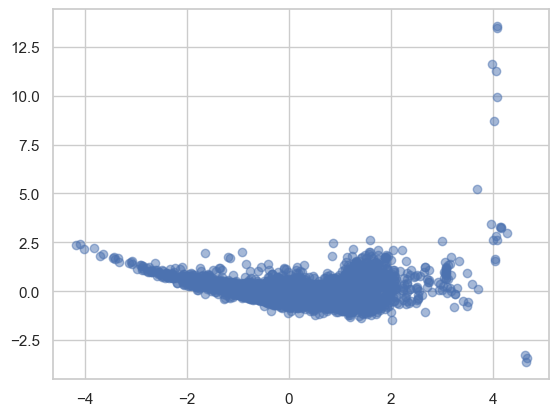

In [30]:
# Residuales - Concentrados en cero indican que es un buen modelo
residuales = np.subtract(Y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()